# Examen

#### Instrucciones

- Crea en tu carpeta, un archivo llamado `examen` y pega el texto de las problemas en él (respeta el formato).

- Contesta inmediatamente abajo del problema.

- Gráficas en calidad profesional (pon ejes, unidades, colores, leyenda, etc.)

- La ortografía, redacción y habilidades de comunicación se tomarán en cuenta.

### Problema 1

(a) Usando `Simpy`, declara las funciones:
$$
y(x) = \cos(x)
$$

$$
z(x) = \sin(x)
$$

$$
w(x) = \frac{1}{\sin(x) + \cos(2x)}
$$

In [31]:
#a)
#DEFINIENDO VARIABLES Y FUNCIONES
from sympy import Symbol
import sympy as sym
from sympy import *
import numpy as np
import matplotlib.pyplot as plt 

x,y,z,w,g = sym.symbols('x,y,z,w,g')

y = Function('y')
z = Function('z')
w = Function('w')

In [32]:
#DECLARANDO LAS ECUACIONES
Eq(y(x),cos(x))

Eq(y(x), cos(x))

In [33]:
Y=cos(x)

In [34]:
Eq(z(x),sin(x))

Eq(z(x), sin(x))

In [35]:
Z=sin(x)

In [36]:
Eq(w(x),1/(sin(x)+cos(2*x)))

Eq(w(x), 1/(sin(x) + cos(2*x)))

In [37]:
W= 1/(sin(x)+cos(2*x))

(b) Obtén la derivada de $g(x)$

$$
g(x) = y(x)*z(x)
$$

In [38]:
#b)
#DEFINIENDO VARIABLES Y FUNCIONES
g = Function('g')
Eq(g(x),y(x)*z(x))

Eq(g(x), y(x)*z(x))

In [39]:
G=Y*Z

In [40]:
#Sustituyendo y(x) y z(x)
Eq(g(x),G)

Eq(g(x), sin(x)*cos(x))

In [41]:
#Derivando simbólicamente
Derivative(G,x)

Derivative(sin(x)*cos(x), x)

In [42]:
diff(G, x)

-sin(x)**2 + cos(x)**2

(c) Grafica $w(x)$ en el dominio $[0,1]$

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


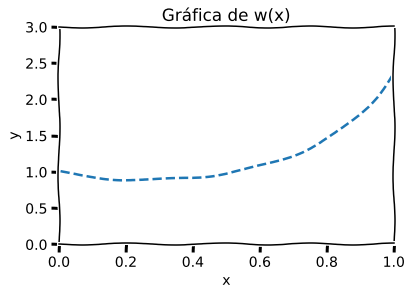

In [43]:
X_graph = np.linspace(-np.pi, np.pi, 256, endpoint=True)
Y_graph = 1 / (np.sin(X_graph)+np.cos(2*X_graph))

plt.xkcd() #Para impresionar
plt.plot(X_graph,Y_graph, linewidth=2.5, linestyle="--")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 1)
plt.ylim(0, 3)
plt.title('Gráfica de w(x)')
plt.show();

(d) Integra de manera indefinida $g(x)$ y luego evalúala desde $0$ a $1$.

In [44]:
#d) INTEGRANDO DE MANERA INDEFINIDA A W(X)
integrate(G, x)

sin(x)**2/2

In [45]:
#INTEGRAL DEFINIDA
integrate(G, (x,0,1))

sin(1)**2/2

(e) ¿Cuál es el límite de $y(x), z(x), g(x)$ y $w(x)$ cuando $x \to 0$.?

In [46]:
#e) LÍMITES
# y(x)
limit(Y,x,0)

1

In [47]:
# z(x)
limit(Z,x,0)

0

In [48]:
# g(x)
limit(G,x,0)

0

In [49]:
# w(x)
limit(W,x,0)

1

(f) Expanda $y(x)$ y $z(x)$ hasta 3 orden en serie de Taylor.

In [50]:
#Debido a que no se da un punto en donde evaluar la serie definamos x_0
x_0 = symbols('x_0')

In [51]:
#f) EXPANDIR y(x)
Y.series(x, x_0, n=3) 

cos(x_0) - (x - x_0)*sin(x_0) - (x - x_0)**2*cos(x_0)/2 + O((x - x_0)**3, (x, x_0))

In [52]:
#EXPANDIR z(x)
Z.series(x, x_0, n=3) 

sin(x_0) + (x - x_0)*cos(x_0) - (x - x_0)**2*sin(x_0)/2 + O((x - x_0)**3, (x, x_0))

In [53]:
.series?

In [ ]:
.series

<div class="alert alert-info">
    
**NOTA** Muestra las expresiones en cada inciso.
</div>

### Problema 2

El [**atractor de Rössler**](http://en.wikipedia.org/wiki/R%C3%B6ssler_attractor) esta descrito por el siguiente conjunto de ecuaciones:

$$
\frac{dx}{dt} = -y -z
$$

$$
\frac{dy}{dt} = x + ay
$$

$$
\frac{dz}{dt} = b + z(x-c)
$$

(a) Resuelva las ecuaciones numéricamente para 

$$
a=0.13 \quad b=0.2 \quad c=6.5 
$$

y condiciones iniciales

$$
x(0)=0 \quad y(0)=0 \quad z(0)=0 
$$

use el método de Runge-Kutta de 2do orden.

In [54]:
#Definamos las funciones
import numpy as np
import matplotlib.pyplot as plt

def RK2(y, t, dt, derivadas):
    k0 = dt*derivadas(y, t)
    k1 = dt*derivadas(y + k0, t + dt)
    y_next = y + 0.5*(k0 + k1)
    
    return y_next




In [55]:
a = 0.13
b= 0.2
c= 6.5
x_0=0
y_0= 0
z_0= 0
N= 1000
tau = 100
dt = tau / (float)(N-1)
Arr =np.array([x,y,z])

def RoesslerRK2 (Arr,t):
    derivx = -(Arr[1]) - Arr[2]
    derivy = Arr[0] + a*Arr[1]
    derivz = b +Arr[2]*(Arr[0]-c)
    return np.array([derivx, derivy, derivz])


(b) Muestra en una gráfica el comportamiento de las soluciones en el tiempo (i.e. grafica $x(t)$, $y(t)$ y $z(t)$).

In [56]:
t=np.linspace(0, tau, N)
Arry= np.zeros([N,3])
x_i = Arry[0,0]
y_i = Arry[0,1]
z_i = Arry[0,2]

In [57]:
for i in range (N):
    Arry[i+1] = RK2(Arry[i], t[i], dt, derivadas)
    coord_x = [Arry[i,0] for i in range (N)]
    coord_y = [Arry[i,1] for i in range (N)]
    coord_z = [Arry[i,2] for i in range (N)]


NameError: name 'derivadas' is not defined

In [58]:
plt.plot(t, coord_x)
plt.plot(t, coord_y)
plt.plot(t, coord_z)

NameError: name 'coord_x' is not defined

(c) Muestra como se ve el **atractor de Rössler** en 3D (i.e. en el espacio).

In [59]:
cond_inicial = [0,0,0] #Aquí empezamos
atractor= solve_ivp(Roessler, [0,101],r0, t_eval=linspace(0,100,10000))
fig = pylab.figure()
ax = pylab.axes(projection="3d")
ax.plot3D(sol.y[0,:], sol.y[1,:], sol.y[2,:], 'red')
pylab.show()

NameError: name 'solve_ivp' is not defined